# Solucion ecuacion de calor metodo implicito 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
from numpy import linalg 
%matplotlib inline

In [2]:
matplotlib.rcParams['text.usetex'] = True 
matplotlib.rcParams['text.latex.unicode'] = True 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
from numpy import linalg 
%matplotlib inline

matplotlib.rcParams['text.usetex'] = True 
matplotlib.rcParams['text.latex.unicode'] = True 

def solu_eq_calor_implicit(alpha,t0,a,b,nt,nx,dt,f):
    L = b-a 
    dx = L/(nx-1.)
    gamma = alpha*dt/dx**2
    
    tmax = nt*dt
    t = np.arange(t0,tmax,dt)
    
    # Inicializacion del vector w 
    w = np.zeros((nx,nt))
    X = np.linspace(a,b,w.shape[0])
    
    print('dimensiones de w', w.shape)
    
    # Condiciones de frontera(Dirichlet homogeneas)
    for j in range(nt):
        w[0,j] = 0
        w[nx-1,j] = 0
        
    # Vector de la derecha y solucion interna 
    rhs = np.zeros(nx-1)
    
    # Elaboracion de la matriz 
    # Matriz A 
    A = np.zeros([nx-1,nx-1])
    
    # Condicion incial 
    for i in range(nx):
        w[i,0] = f(X[i])
        
    for i in range(0,nx-1,1):
        A[i][i] = 1.0+2.0*gamma 
        if i > 0: A[i][i-1] = -gamma 
        if i < nx-2: A[i][i+1] = -gamma 
        
    print('Gamma', gamma)
    
    # Ciclo sobre tiempos 
    for j in range(0, nt-1):
        #vector del lado derecho
        for i in range(nx-1):
            rhs[i] = w[i+1,j]
            
        rhs[0] -= gamma*w[0,j]
        rhs[nx-2] += gamma*w[nx-1,j]
        
        # Resuelve Aw_j+1= w_j
        x = linalg.solve(A, rhs)
        
        # Rotacion 
        for i in range(nx-2):
            w[i+1,j+1] = x[i]
            
    return w

In [4]:
alpha = 1
a = 0 
b = 1
nt = 40001
nx = 101
dt = 0.00001
t0 = 0 
x0 = 0
L = b-a 

def f(x):
    return 6*np.sin(np.pi*x/L)

w=solu_eq_calor_implicit(alpha,t0,a,b,nt,nx,dt,f)

('dimensiones de w', (101, 40001))
('Gamma', 0.1)


In [5]:
plt.xlabel(r"$x$")
plt.ylabel(r'$calor$')
plt.title(r'Curvas de calor. Solucion numerica')

X = np.linspace(a,b,w.shape[0])
for j in range(0,nt,10000):
    t=j*dt
    plt.plot(X,w[:,j], label=str(round(t,1)) +'seg')
    plt.legend(labelspacing=1, title="tiempo")
    
plt.grid(True)

RuntimeError: LaTeX was not able to process the following string:
'lp'
Here is the full report generated by LaTeX: 



# Error con respecto a la solución analítica

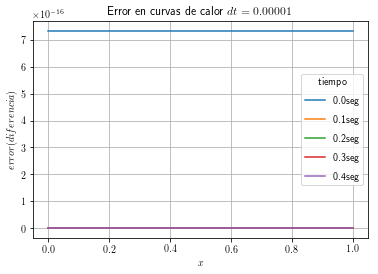

In [34]:
def u(x,t):
    return 6*np.sin(np.pi*x/L)*np.exp(-(1.0/alpha)*(np.pi/L)**2*t)

nt=40001
dt=0.00001
Nt=int(nt/10000)+1
dx=(b-a)/(nx-1.)
error =np.zeros((nx,Nt))
k=0

for j in range(0,nt,10000):
    t=j*dt
    for i in range(nx):
        x=i*dx
        error[:,k]=w[i,j]-u(x,t)
    k += 1
    
params={'legend.fontsize':5,'legend.handlength':1}
plt.xlabel(r"$x$")
plt.ylabel(r'$error (diferencia)$')
plt.title(r'Error en curvas de calor $dt=0.00001$')    
X = np.linspace(0,L,w.shape[0])
Dt=0.1
for j in range(0,Nt):
    t=j*Dt
    plt.plot(X,error[:,j], label=str(round(t,1)) +'seg')
    plt.legend(labelspacing=1, title="tiempo")
plt.grid(True)